<center><u><b><h1>Sentimental Analysis</h1></b></u></center>

In [1]:
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df=pd.read_csv('./Dataset/train.csv') 
df.drop('id', axis=1 ,inplace=True) 

In [3]:
df.shape

(31962, 2)

In [4]:
df.head() 

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [5]:
df.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [6]:
def bar_chart(feature):
    Positive = df[df['label']==0][feature].value_counts()
    Negative = df[df['label']==1][feature].value_counts()
    d1 = pd.DataFrame([Positive,Negative])
    d1.index = ['Positive','Negative']
    d1.plot(kind='bar')

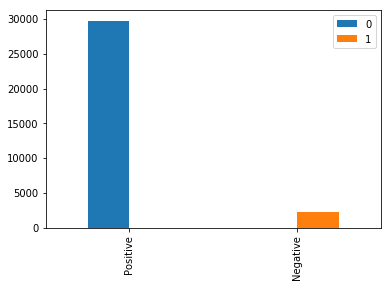

In [7]:
bar_chart('label')

In [8]:
def remove(a, pattern):
    r = re.findall(pattern, a)
    for i in r:
        a = re.sub(i,'', a)
        
    return a  

In [9]:
df['Processed_Tweets'] = np.vectorize(remove)(df['tweet'], "@[\S]*") 

In [10]:
df.head()

,label,tweet,Processed_Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
df['Processed_Tweets'] = df['Processed_Tweets'].str.replace("[^\w\s]", " ")

In [12]:
df.head()

,label,tweet,Processed_Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now motivation


In [13]:
df['Processed_Tweets'] = df['Processed_Tweets'].str.replace("[^a-zA-Z0-9]", " ")

In [14]:
df.head()

,label,tweet,Processed_Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now motivation


In [15]:
df['Processed_Tweets'] = df['Processed_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [16]:
token= df['Processed_Tweets'].apply(lambda x: x.split())
token.head()

0    [when, father, dysfunctional, and, selfish, dr...
1    [thanks, for, lyft, credit, can, use, cause, t...
2                              [bihday, your, majesty]
3            [model, love, take, with, all, the, time]
4               [factsguide, society, now, motivation]
Name: Processed_Tweets, dtype: object

In [17]:
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()

In [18]:
token = token.apply(lambda x:[wl.lemmatize(i) for i in x])

In [19]:
for i in range(len(token)):
    token[i] = ' '.join(token[i])

df['Processed_Tweets'] = token

In [20]:
df.head()

,label,tweet,Processed_Tweets
0,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drag his...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can use cause they don ...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model love take with all the time
4,0,factsguide: society now #motivation,factsguide society now motivation


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=3000, stop_words='english')
x = tv.fit_transform(df['Processed_Tweets'])
y= df.iloc[:,0].values

In [22]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [24]:
bnb = BernoulliNB() 
bnb.fit(x_train,y_train) 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
y_pred=bnb.predict(x_test) 

In [26]:
f1_score(y_test, y_pred) 

0.64

In [27]:
y_pred=bnb.predict(x_train) 

In [28]:
f1_score(y_train, y_pred) 

0.6573269823479967

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
np.mean(cross_val_score(bnb,x_train,y_train,cv=5))*100 

94.4307381347309